In [1]:
!pip install qiskit qiskit-ibmq-provider matplotlib pylatexenc qiskit-aer


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
# All imports here.
import qiskit
from qiskit import IBMQ

In [4]:
# Initialise and load the IBM account to access the quantum hardware.
IBMQ.save_account(
    "9228c681cbbec9c39509629102cb2c9f17d63be1e51554a71a09797df15cfb5c45b40805adcb834e9c54116b9484b72bf7dfd7bac15513a6e6a39a57f8aeacac"
)
IBMQ.load_account()

/tmp/ipykernel_327197/247839520.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(
/tmp/ipykernel_327197/247839520.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(
configrc.store_credentials:WARNING:2024-02-16 15:02:43,241: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
from qiskit import *

/home/szymon/Documents/quantum-computing/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


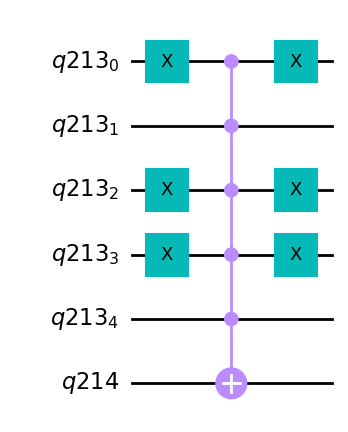

In [88]:
# Implementation of Grovers's Algorithm.

# First we define the Uf oracle gate
input = QuantumRegister(5)
output = QuantumRegister(1)
u_f = QuantumCircuit(input, output, name="u_f")

u_f.x(input[0])
u_f.x(input[2])
u_f.x(input[3])

u_f.mcx(input[::], output[0])

u_f.x(input[0])
u_f.x(input[2])
u_f.x(input[3])


Uf = u_f.to_gate()

u_f.draw(output="mpl")

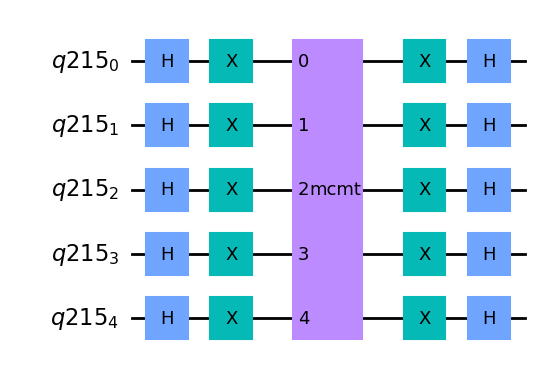

In [89]:
# Now we define W
u_f.draw(output="mpl")
from qiskit.circuit.library import MCMT

w_qr = QuantumRegister(5)
w = QuantumCircuit(w_qr, name="w")

w.h(w_qr[::])
w.x(w_qr[::])
# w.mcx(list(range(4)), 4)
controlled_z = MCMT("z", 4, 1)
Z = controlled_z.to_gate()
w.append(Z, list(range(5)))
w.x(w_qr[::])
w.h(w_qr[::])

W = w.to_gate()

w.draw(output="mpl")

/home/szymon/Documents/quantum-computing/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


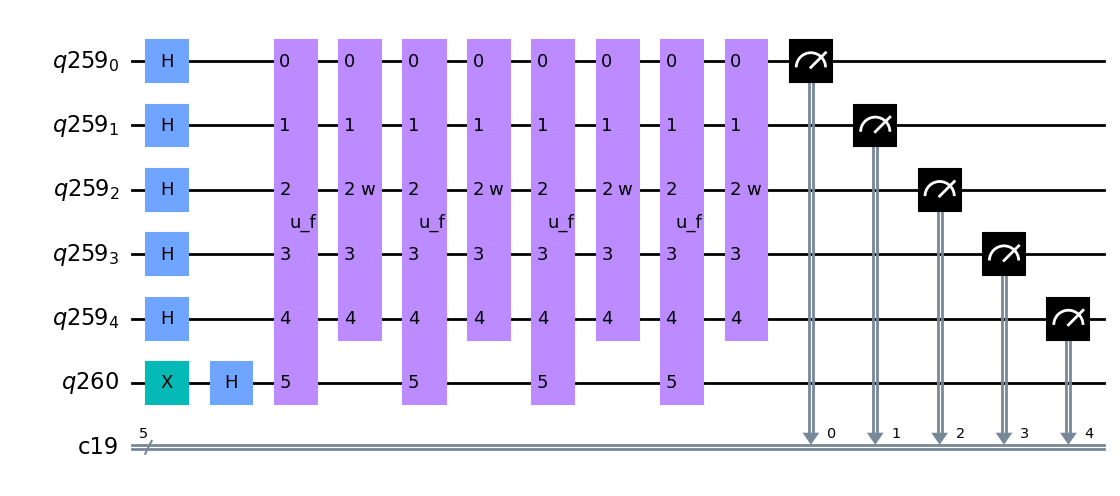

In [98]:
input = QuantumRegister(5)
output = QuantumRegister(1)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(input, output, cr)
circuit.x(output[0])
circuit.h(range(len(input) + len(output)))

# N = 32 and so in order to maximise probability, we need to have t = pi / 4 * sqrt(32) = pi * sqrt(2) = 4.442 approx.

for _ in range(4):
    circuit.append(Uf, range(len(input) + len(output)))
    circuit.append(W, input[::])

circuit.measure(input, cr)
circuit.draw(output="mpl")

/tmp/ipykernel_327197/1104314868.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, simulator, shots=1).result()


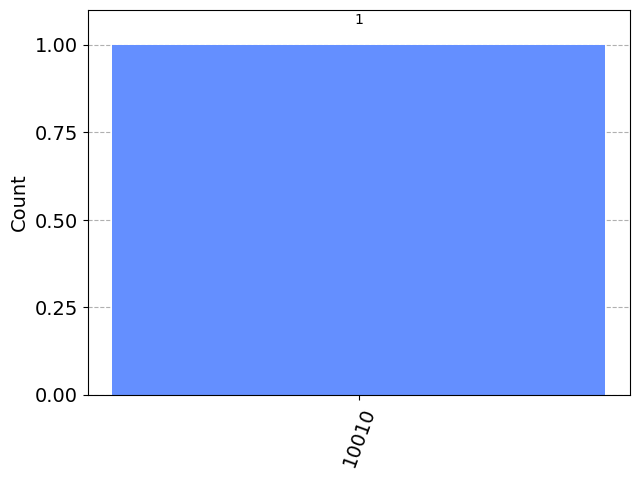

In [100]:
simulator = Aer.get_backend("qasm_simulator")
result = execute(circuit, simulator, shots=1).result()
from qiskit.tools.visualization import plot_histogram

plot_histogram(result.get_counts(circuit))
# As we could see that number a was found using just a single shot.
# This means that the circuit ensures that the probability of measuring that
# state is large.